# Построение простого стационарного решения уравнения фильтрации

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

Простое решение имеет вид
$$Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{ln(\dfrac{r_e}{r_w})}$$

Это решение известно как закон Дарси или формула Дюпюи

Его можно переписать в виде

$$P_{wf} = P_{res} - 18.41\dfrac{ Q\mu B }{kh}ln(\dfrac{r_e}{r_w})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Определение функции для использования в дальнейших расчетах

Название функции формируется по следующим принципам
* сначала указывается, что расчитывается в функции, в данном случае - давление $p$
* потом указываются пояснения - в данном случае p_ss - steady state pressure
* в конце указывается размерность в которой ожидается получаение ответа - в данном случае atma - абсолютные атмосферы

In [2]:
def p_ss_atma(p_res_atma = 250,
                 q_liq_sm3day = 50,
                 mu_cP = 1,
                 B_m3m3 = 1.2,
                 k_mD = 40,
                 h_m = 10,
                 r_e = 240,
                 r = 0.1):
  """
  функция расчета давления в произвольной точке пласта для стационарного решения 
  уравнения фильтрации 
  p_res_atma - пластовое давление, давление на контуре питания
  q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  mu_cP - вязкость нефти (в пластовых условиях)
  B_m3m3 - объемный коэффициент нефти 
  k_mD - проницаемость пласта
  h_m - мощность пласта
  r_e - радиус контрура питания 
  r - расстояние на котором проводится расчет
  """
  return p_res_atma - 18.41 * q_liq_sm3day*mu_cP*B_m3m3/k_mD/h_m * np.log(r_e/r)


## Построение графика с использованием **matplotlib**

Самый простой пример построения графика - использование библиотеки matplotlib.

Для формирования графика требуется создать два массива значений - x и y и отобразить их. Для формирования массива используются методы библиотеки numpy.

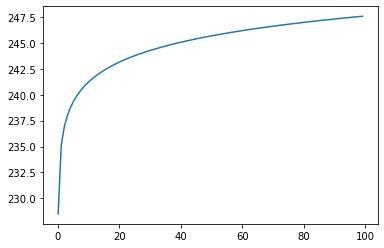

In [4]:
r = np.arange(0.1, 100, 1)

plt.plot(r, p_ss_atma(r=r))
plt.show()

График можно улучшать и настраивать - дать название графику и осям, изменить подписи к осям, изменить цветовую схему. Для настройки графика воспользуйтесь поиском в интернете.

# Задания для самостоятельной работы

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте график распределения давления в пласте для композитного пласта. В композитном пласте на расстоянии $r<r_1$ проницаемость равна $k=k_1$, а для $r>=r_1$, $k=k_2$. 
2. Постройте двумерную тепловую карту распределения давления в пласте для моделей однородного пласта и композитного пласта. 
3. Рассчитайте среднюю величину давления в круговой области дренирования для однородного пласта. Насколько среднее давление в круговой области дренирования будет отличаться от давления на контуре. Чему будет равен коэффициент $S$ в выражении  $Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{ln(\dfrac{r_e}{r_w})+S}$ при использовании вместо давления на контуре среднего давления? Постройте график, на котором будет отображаться распределение давления в зоне дренирования и величина среднего давления (в виде линии).
